In [9]:
# some standard packages to assist this tutorial
import cpa
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc
import anndata as ad
from scipy.sparse import csr_matrix

In [10]:
data_path = '/data/share/cnic02/projects/perturb_cwt/bulk_3072_train_test_CPA.h5ad'
model_save_dir = '/data/share/cnic02/models/cpa_models/0424_bulk/'

In [11]:
adata = sc.read(data_path)


In [12]:
adata.to_df()

,Hnrnpll,Hspa9,Igf2bp2,Imp3,Larp1,Larp4,Lgals3,Lsm1,Lsm14a,Lsm3,...,Zscan29,Zscan4-ps1,Zscan4-ps2,Zscan4-ps3,Zscan4b,Zscan4c,Zscan4d,Zscan4e,Zscan4f,Zscan5b
0,0.700315,3.988474,0.183818,4.936464,2.526417,2.623999,0.000000,1.006218,2.748409,3.499748,...,1.336762,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,3.096880,3.824309,1.252462,3.591532,3.081105,2.449253,6.961417,1.678718,3.785726,2.999847,...,2.459119,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,3.154039,3.867253,1.063963,3.550862,3.027438,2.371869,7.044977,1.822219,3.851456,3.094337,...,2.528043,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,3.660577,5.140118,0.508509,4.892746,3.136171,2.778263,1.303222,3.354764,3.503367,5.686224,...,1.407123,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,3.925710,5.969414,3.440687,3.995621,3.966354,3.687376,3.721078,2.813180,4.332323,4.784412,...,1.603850,0.000000,0.010536,0.020651,0.0,0.000000,0.084552,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,3.801299,5.843260,3.741159,4.274449,4.069477,3.528722,4.610158,3.055685,4.208447,5.420596,...,1.585602,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.407489
5,3.885268,5.742072,3.575843,3.977438,4.909152,3.544987,0.000000,3.059707,4.249671,5.060699,...,1.568989,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
6,3.560269,4.951774,3.891384,3.426256,3.952610,3.056942,2.779677,1.913038,3.916031,3.724683,...,1.642379,0.048887,0.077894,0.027334,0.0,0.058244,0.036717,0.080222,0.000000,0.056580
7,2.821351,4.700342,2.700467,3.411614,4.268351,2.599738,4.253296,2.134492,3.293097,3.932155,...,1.314861,0.085950,0.038690,0.042428,0.0,0.133236,0.075808,0.088611,0.073897,0.000000


In [13]:
adata.obs

,batch,knock_gene,knock_or_not,split,control
0,1,Jagn1_1,no,train,1
1,1,Dhcr24_2,no,train,1
2,0,Dhcr24_3,no,train,1
3,1,Epcam_4,no,train,1
4,0,Cdk8_5,no,train,1
...,...,...,...,...,...
4,1,Dnmt3b_5,yes,ood,1
5,1,Dnmt3b_6,yes,ood,1
6,0,Ino80_7,yes,ood,1
7,1,Evx1_8,yes,ood,1


In [14]:
adata.obs = adata.obs.astype('category')
adata.obs['split'] = adata.obs['split'].astype('category')
adata.obs['knock_gene'] = adata.obs['knock_gene'].astype('category')
adata.obs['knock_or_not'] = adata.obs['knock_or_not'].astype('category')
adata.obs['control'] = adata.obs['control'].astype('category')
adata.obs['knock_gene'].cat.categories
adata.obs['knock_or_not'].cat.categories
cpa_api = cpa.api.API(
    adata, 
    perturbation_key='knock_gene',
    doser_type='logisim',
    dose_key='batch',
    split_key='split',
    covariate_keys=['knock_or_not'],
    save_dir=model_save_dir,
    only_parameters=False,
    hparams={}, 
)  

WARNING. Special characters ('_') were found in: 'knock_gene'. They will be replaced with '-'. Be careful, it may lead to errors downstream.
Creating 'cov_drug_dose_name' field.
Ranking genes for DE genes.
{'5730403I07Rik-56': ['Lgals3', 'Gm13212', 'Erg', 'S100a9', 'Zfp335', 'Dgkq', 'Ncor2', 'Crtc2', 'Ep300', 'Nfe2', 'Padi4', 'Sirt4', 'S100a8', 'Ctnnd1', 'Fam129b', 'Zfp433', 'Mapk14', 'Arhgap5', 'Ifi204', 'Barhl1', 'Litaf', 'Srf', 'Myc', 'Nr1i2', 'Zfp865', 'Sin3a', 'Nfkb2', 'Raver2', 'Elane', 'Creb5', 'Nf1', 'Nr1h2', 'Hmgxb3', 'Gabpb1', 'Cul3', 'Zfp385a', 'Rps6ka4', 'Gm5294', 'Mllt1', 'Zfat', 'Sirt6', 'Eno1', 'Fgf1', 'Traf6', 'Zfp819', 'Elmsan1', 'Pqbp1', 'Rreb1', 'Gtf2h2', 'Apobec2'], 'A1cf-3078': ['Ctnnd1', 'Sall1', 'Lhx1', 'Prkaa2', 'Arnt2', 'Sox13', 'Parp12', 'Emx1', 'Mlxipl', 'Gm14418', 'Notch3', 'Ifi211', 'Ovol1', 'Hoxa7', 'Zfp641', 'Hoxd11', 'Hoxa9', 'Hoxa10', 'Gm14399', 'L3mbtl2', 'Mapk14', 'Zfp109', 'Hipk3', 'Tut7', 'Fbp1', 'Rorc', 'Usf3', 'Grhpr', 'Emx2', 'Zfp970', 'Sirt3', '

In [42]:
cpa_api.train(
max_epochs=10, 
run_eval=True, 
checkpoint_freq=20,
filename='bulk_cpa_1000.pt', 
max_minutes=2*60
)

Results will be saved to the folder: /data/share/cnic02/models/cpa_models/0424_bulk/


  0%|                                                    | 0/10 [00:00<?, ?it/s]

tensor([[-0.8080, -1.1297,  0.3556,  ..., -0.4005,  0.4187, -1.0223],
        [ 0.7867, -1.0309,  0.9194,  ...,  0.6650, -0.9018, -0.2948],
        [-0.8080, -1.1297,  0.3556,  ..., -0.4005,  0.4187, -1.0223],
        ...,
        [-0.8080, -1.1297,  0.3556,  ..., -0.4005,  0.4187, -1.0223],
        [-0.8080, -1.1297,  0.3556,  ..., -0.4005,  0.4187, -1.0223],
        [ 0.7867, -1.0309,  0.9194,  ...,  0.6650, -0.9018, -0.2948]],
       device='cuda:0', grad_fn=<EmbeddingBackward0>)
tensor([[-0.8080, -1.1297,  0.3556,  ..., -0.4005,  0.4187, -1.0223],
        [ 0.7867, -1.0309,  0.9194,  ...,  0.6650, -0.9018, -0.2948],
        [ 0.7867, -1.0309,  0.9194,  ...,  0.6650, -0.9018, -0.2948],
        ...,
        [ 0.7867, -1.0309,  0.9194,  ...,  0.6650, -0.9018, -0.2948],
        [ 0.7867, -1.0309,  0.9194,  ...,  0.6650, -0.9018, -0.2948],
        [ 0.7867, -1.0309,  0.9194,  ...,  0.6650, -0.9018, -0.2948]],
       device='cuda:0', grad_fn=<EmbeddingBackward0>)
tensor([[ 0.7867, -1.030

Rec: -0.8792, AdvPert: 0.03, AdvCov: 0.69:  10%| | 1/10 [00:00<00:05,  1.70it/s]

tensor([[-0.8080, -1.1297,  0.3556,  ..., -0.4005,  0.4187, -1.0224],
        [ 0.7867, -1.0309,  0.9193,  ...,  0.6650, -0.9018, -0.2948],
        [-0.8080, -1.1297,  0.3556,  ..., -0.4005,  0.4187, -1.0224],
        ...,
        [-0.8080, -1.1297,  0.3556,  ..., -0.4005,  0.4187, -1.0224],
        [-0.8080, -1.1297,  0.3556,  ..., -0.4005,  0.4187, -1.0224],
        [ 0.7867, -1.0309,  0.9193,  ...,  0.6650, -0.9018, -0.2948]],
       device='cuda:0', grad_fn=<EmbeddingBackward0>)
tensor([[ 0.7867, -1.0309,  0.9193,  ...,  0.6650, -0.9018, -0.2948],
        [ 0.7867, -1.0309,  0.9193,  ...,  0.6650, -0.9018, -0.2948],
        [-0.8080, -1.1297,  0.3556,  ..., -0.4005,  0.4187, -1.0224],
        ...,
        [-0.8080, -1.1297,  0.3556,  ..., -0.4005,  0.4187, -1.0224],
        [-0.8080, -1.1297,  0.3556,  ..., -0.4005,  0.4187, -1.0224],
        [-0.8080, -1.1297,  0.3556,  ..., -0.4005,  0.4187, -1.0224]],
       device='cuda:0', grad_fn=<EmbeddingBackward0>)
tensor([[-0.8080, -1.129

Rec: -0.8813, AdvPert: 0.03, AdvCov: 0.69:  20%|▏| 2/10 [00:00<00:03,  2.07it/s]

tensor([[-0.8080, -1.1298,  0.3556,  ..., -0.4005,  0.4187, -1.0224],
        [ 0.7866, -1.0308,  0.9193,  ...,  0.6649, -0.9017, -0.2947],
        [-0.8080, -1.1298,  0.3556,  ..., -0.4005,  0.4187, -1.0224],
        ...,
        [ 0.7866, -1.0308,  0.9193,  ...,  0.6649, -0.9017, -0.2947],
        [-0.8080, -1.1298,  0.3556,  ..., -0.4005,  0.4187, -1.0224],
        [-0.8080, -1.1298,  0.3556,  ..., -0.4005,  0.4187, -1.0224]],
       device='cuda:0', grad_fn=<EmbeddingBackward0>)
tensor([[ 0.7866, -1.0308,  0.9193,  ...,  0.6649, -0.9017, -0.2947],
        [ 0.7866, -1.0308,  0.9193,  ...,  0.6649, -0.9017, -0.2947],
        [-0.8080, -1.1298,  0.3556,  ..., -0.4005,  0.4187, -1.0224],
        ...,
        [ 0.7866, -1.0308,  0.9193,  ...,  0.6649, -0.9017, -0.2947],
        [ 0.7866, -1.0308,  0.9193,  ...,  0.6649, -0.9017, -0.2947],
        [ 0.7866, -1.0308,  0.9193,  ...,  0.6649, -0.9017, -0.2947]],
       device='cuda:0', grad_fn=<EmbeddingBackward0>)
tensor([[-0.8080, -1.129

Rec: -0.8804, AdvPert: 0.03, AdvCov: 0.69:  30%|▎| 3/10 [00:01<00:03,  2.12it/s]

tensor([[ 0.7866, -1.0308,  0.9193,  ...,  0.6649, -0.9017, -0.2947],
        [ 0.7866, -1.0308,  0.9193,  ...,  0.6649, -0.9017, -0.2947],
        [ 0.7866, -1.0308,  0.9193,  ...,  0.6649, -0.9017, -0.2947],
        ...,
        [ 0.7866, -1.0308,  0.9193,  ...,  0.6649, -0.9017, -0.2947],
        [-0.8080, -1.1298,  0.3556,  ..., -0.4005,  0.4187, -1.0224],
        [ 0.7866, -1.0308,  0.9193,  ...,  0.6649, -0.9017, -0.2947]],
       device='cuda:0', grad_fn=<EmbeddingBackward0>)
tensor([[ 0.7866, -1.0308,  0.9193,  ...,  0.6649, -0.9017, -0.2947],
        [-0.8080, -1.1298,  0.3556,  ..., -0.4005,  0.4187, -1.0224],
        [ 0.7866, -1.0308,  0.9193,  ...,  0.6649, -0.9017, -0.2947],
        ...,
        [ 0.7866, -1.0308,  0.9193,  ...,  0.6649, -0.9017, -0.2947],
        [-0.8080, -1.1298,  0.3556,  ..., -0.4005,  0.4187, -1.0224],
        [-0.8080, -1.1298,  0.3556,  ..., -0.4005,  0.4187, -1.0224]],
       device='cuda:0', grad_fn=<EmbeddingBackward0>)
tensor([[ 0.7866, -1.030

Rec: -0.8797, AdvPert: 0.03, AdvCov: 0.69:  40%|▍| 4/10 [00:01<00:02,  2.25it/s]

tensor([[ 0.7867, -1.0308,  0.9193,  ...,  0.6650, -0.9018, -0.2947],
        [-0.8080, -1.1298,  0.3556,  ..., -0.4005,  0.4187, -1.0224],
        [-0.8080, -1.1298,  0.3556,  ..., -0.4005,  0.4187, -1.0224],
        ...,
        [ 0.7867, -1.0308,  0.9193,  ...,  0.6650, -0.9018, -0.2947],
        [-0.8080, -1.1298,  0.3556,  ..., -0.4005,  0.4187, -1.0224],
        [ 0.7867, -1.0308,  0.9193,  ...,  0.6650, -0.9018, -0.2947]],
       device='cuda:0', grad_fn=<EmbeddingBackward0>)
tensor([[-0.8080, -1.1298,  0.3556,  ..., -0.4005,  0.4187, -1.0224],
        [-0.8080, -1.1298,  0.3556,  ..., -0.4005,  0.4187, -1.0224],
        [ 0.7867, -1.0308,  0.9193,  ...,  0.6650, -0.9018, -0.2947],
        ...,
        [ 0.7867, -1.0308,  0.9193,  ...,  0.6650, -0.9018, -0.2947],
        [ 0.7867, -1.0308,  0.9193,  ...,  0.6650, -0.9018, -0.2947],
        [-0.8080, -1.1298,  0.3556,  ..., -0.4005,  0.4187, -1.0224]],
       device='cuda:0', grad_fn=<EmbeddingBackward0>)
tensor([[-0.8080, -1.129

Rec: -0.8839, AdvPert: 0.03, AdvCov: 0.69:  50%|▌| 5/10 [00:02<00:02,  2.25it/s]

tensor([[-0.8080, -1.1298,  0.3555,  ..., -0.4005,  0.4188, -1.0224],
        [-0.8080, -1.1298,  0.3555,  ..., -0.4005,  0.4188, -1.0224],
        [ 0.7867, -1.0308,  0.9194,  ...,  0.6650, -0.9018, -0.2947],
        ...,
        [ 0.7867, -1.0308,  0.9194,  ...,  0.6650, -0.9018, -0.2947],
        [-0.8080, -1.1298,  0.3555,  ..., -0.4005,  0.4188, -1.0224],
        [-0.8080, -1.1298,  0.3555,  ..., -0.4005,  0.4188, -1.0224]],
       device='cuda:0', grad_fn=<EmbeddingBackward0>)
tensor([[ 0.7867, -1.0308,  0.9194,  ...,  0.6650, -0.9018, -0.2947],
        [-0.8080, -1.1298,  0.3555,  ..., -0.4005,  0.4188, -1.0224],
        [-0.8080, -1.1298,  0.3555,  ..., -0.4005,  0.4188, -1.0224],
        ...,
        [-0.8080, -1.1298,  0.3555,  ..., -0.4005,  0.4188, -1.0224],
        [ 0.7867, -1.0308,  0.9194,  ...,  0.6650, -0.9018, -0.2947],
        [ 0.7867, -1.0308,  0.9194,  ...,  0.6650, -0.9018, -0.2947]],
       device='cuda:0', grad_fn=<EmbeddingBackward0>)
tensor([[ 0.7867, -1.030

Rec: -0.8841, AdvPert: 0.03, AdvCov: 0.69:  60%|▌| 6/10 [00:03<00:02,  1.82it/s]

tensor([[ 0.7867, -1.0307,  0.9194,  ...,  0.6650, -0.9018, -0.2947],
        [ 0.7867, -1.0307,  0.9194,  ...,  0.6650, -0.9018, -0.2947],
        [-0.8080, -1.1299,  0.3555,  ..., -0.4005,  0.4187, -1.0225],
        ...,
        [-0.8080, -1.1299,  0.3555,  ..., -0.4005,  0.4187, -1.0225],
        [-0.8080, -1.1299,  0.3555,  ..., -0.4005,  0.4187, -1.0225],
        [-0.8080, -1.1299,  0.3555,  ..., -0.4005,  0.4187, -1.0225]],
       device='cuda:0', grad_fn=<EmbeddingBackward0>)
tensor([[ 0.7867, -1.0307,  0.9194,  ...,  0.6650, -0.9018, -0.2947],
        [ 0.7867, -1.0307,  0.9194,  ...,  0.6650, -0.9018, -0.2947],
        [-0.8080, -1.1299,  0.3555,  ..., -0.4005,  0.4187, -1.0225],
        ...,
        [ 0.7867, -1.0307,  0.9194,  ...,  0.6650, -0.9018, -0.2947],
        [-0.8080, -1.1299,  0.3555,  ..., -0.4005,  0.4187, -1.0225],
        [ 0.7867, -1.0307,  0.9194,  ...,  0.6650, -0.9018, -0.2947]],
       device='cuda:0', grad_fn=<EmbeddingBackward0>)
tensor([[-0.8080, -1.129

Rec: -0.8833, AdvPert: 0.03, AdvCov: 0.69:  70%|▋| 7/10 [00:03<00:01,  1.73it/s]

tensor([[ 0.7868, -1.0307,  0.9194,  ...,  0.6650, -0.9018, -0.2947],
        [ 0.7868, -1.0307,  0.9194,  ...,  0.6650, -0.9018, -0.2947],
        [ 0.7868, -1.0307,  0.9194,  ...,  0.6650, -0.9018, -0.2947],
        ...,
        [-0.8081, -1.1299,  0.3555,  ..., -0.4005,  0.4188, -1.0224],
        [ 0.7868, -1.0307,  0.9194,  ...,  0.6650, -0.9018, -0.2947],
        [ 0.7868, -1.0307,  0.9194,  ...,  0.6650, -0.9018, -0.2947]],
       device='cuda:0', grad_fn=<EmbeddingBackward0>)
tensor([[-0.8081, -1.1299,  0.3555,  ..., -0.4005,  0.4188, -1.0224],
        [-0.8081, -1.1299,  0.3555,  ..., -0.4005,  0.4188, -1.0224],
        [ 0.7868, -1.0307,  0.9194,  ...,  0.6650, -0.9018, -0.2947],
        ...,
        [ 0.7868, -1.0307,  0.9194,  ...,  0.6650, -0.9018, -0.2947],
        [ 0.7868, -1.0307,  0.9194,  ...,  0.6650, -0.9018, -0.2947],
        [-0.8081, -1.1299,  0.3555,  ..., -0.4005,  0.4188, -1.0224]],
       device='cuda:0', grad_fn=<EmbeddingBackward0>)
tensor([[-0.8081, -1.129

Rec: -0.8799, AdvPert: 0.03, AdvCov: 0.69:  80%|▊| 8/10 [00:04<00:01,  1.74it/s]

tensor([[ 0.7868, -1.0308,  0.9193,  ...,  0.6650, -0.9018, -0.2947],
        [ 0.7868, -1.0308,  0.9193,  ...,  0.6650, -0.9018, -0.2947],
        [-0.8081, -1.1298,  0.3556,  ..., -0.4005,  0.4188, -1.0225],
        ...,
        [ 0.7868, -1.0308,  0.9193,  ...,  0.6650, -0.9018, -0.2947],
        [ 0.7868, -1.0308,  0.9193,  ...,  0.6650, -0.9018, -0.2947],
        [ 0.7868, -1.0308,  0.9193,  ...,  0.6650, -0.9018, -0.2947]],
       device='cuda:0', grad_fn=<EmbeddingBackward0>)
tensor([[-0.8081, -1.1298,  0.3556,  ..., -0.4005,  0.4188, -1.0225],
        [ 0.7868, -1.0308,  0.9193,  ...,  0.6650, -0.9018, -0.2947],
        [-0.8081, -1.1298,  0.3556,  ..., -0.4005,  0.4188, -1.0225],
        ...,
        [-0.8081, -1.1298,  0.3556,  ..., -0.4005,  0.4188, -1.0225],
        [-0.8081, -1.1298,  0.3556,  ..., -0.4005,  0.4188, -1.0225],
        [ 0.7868, -1.0308,  0.9193,  ...,  0.6650, -0.9018, -0.2947]],
       device='cuda:0', grad_fn=<EmbeddingBackward0>)
tensor([[ 0.7868, -1.030

Rec: -0.8789, AdvPert: 0.03, AdvCov: 0.69:  90%|▉| 9/10 [00:04<00:00,  1.90it/s]

tensor([[-0.8081, -1.1299,  0.3556,  ..., -0.4005,  0.4187, -1.0225],
        [-0.8081, -1.1299,  0.3556,  ..., -0.4005,  0.4187, -1.0225],
        [-0.8081, -1.1299,  0.3556,  ..., -0.4005,  0.4187, -1.0225],
        ...,
        [-0.8081, -1.1299,  0.3556,  ..., -0.4005,  0.4187, -1.0225],
        [ 0.7868, -1.0307,  0.9193,  ...,  0.6649, -0.9018, -0.2946],
        [ 0.7868, -1.0307,  0.9193,  ...,  0.6649, -0.9018, -0.2946]],
       device='cuda:0', grad_fn=<EmbeddingBackward0>)
tensor([[-0.8081, -1.1299,  0.3556,  ..., -0.4005,  0.4187, -1.0225],
        [ 0.7868, -1.0307,  0.9193,  ...,  0.6649, -0.9018, -0.2946],
        [ 0.7868, -1.0307,  0.9193,  ...,  0.6649, -0.9018, -0.2946],
        ...,
        [ 0.7868, -1.0307,  0.9193,  ...,  0.6649, -0.9018, -0.2946],
        [-0.8081, -1.1299,  0.3556,  ..., -0.4005,  0.4187, -1.0225],
        [-0.8081, -1.1299,  0.3556,  ..., -0.4005,  0.4187, -1.0225]],
       device='cuda:0', grad_fn=<EmbeddingBackward0>)
tensor([[-0.8081, -1.129

Rec: -0.8803, AdvPert: 0.03, AdvCov: 0.69:  90%|▉| 9/10 [00:05<00:00,  1.90it/s]

tensor([[ 0.7868, -1.0308,  0.9193,  ...,  0.6649, -0.9018, -0.2946],
        [ 0.7868, -1.0308,  0.9193,  ...,  0.6649, -0.9018, -0.2946],
        [-0.8081, -1.1298,  0.3556,  ..., -0.4005,  0.4188, -1.0225],
        ...,
        [-0.8081, -1.1298,  0.3556,  ..., -0.4005,  0.4188, -1.0225],
        [ 0.7868, -1.0308,  0.9193,  ...,  0.6649, -0.9018, -0.2946],
        [ 0.7868, -1.0308,  0.9193,  ...,  0.6649, -0.9018, -0.2946]],
       device='cuda:0', grad_fn=<EmbeddingBackward0>)
tensor([[ 0.7868, -1.0308,  0.9193,  ...,  0.6649, -0.9018, -0.2946],
        [-0.8081, -1.1298,  0.3556,  ..., -0.4005,  0.4188, -1.0225],
        [-0.8081, -1.1298,  0.3556,  ..., -0.4005,  0.4188, -1.0225],
        ...,
        [ 0.7868, -1.0308,  0.9193,  ...,  0.6649, -0.9018, -0.2946],
        [ 0.7868, -1.0308,  0.9193,  ...,  0.6649, -0.9018, -0.2946],
        [ 0.7868, -1.0308,  0.9193,  ...,  0.6649, -0.9018, -0.2946]],
       device='cuda:0', grad_fn=<EmbeddingBackward0>)
tensor([[-0.8081, -1.129

Rec: -0.8803, AdvPert: 0.03, AdvCov: 0.69:  90%|▉| 9/10 [00:07<00:00,  1.23it/s]

Model saved to: /data/share/cnic02/models/cpa_models/0424_bulk/bulk_cpa_1000.pt
{'ellapsed_minutes': 0.08491570552190145,
 'epoch': 9,
 'evaluation_stats': {'knock_or_not disentanglement': 0.0,
                      'ood': [-1, -1, -1, -1],
                      'optimal for knock_or_not': 0.5,
                      'optimal for perturbations': 0.00030003000300030005,
                      'perturbation disentanglement': 0.0,
                      'test': [-1, -1, -1, -1],
                      'training': [-1, -1, -1, -1]},
 'training_stats': defaultdict(<class 'float'>,
                               {'loss_adv_covariates': 0.6931659464652722,
                                'loss_adv_drugs': 0.02638777983016693,
                                'loss_reconstruction': -0.8802630649163172,
                                'penalty_adv_covariates': 1.5028598031018376e-18,
                                'penalty_adv_drugs': 6.4590343078827154e-06})}
Stop epoch: 9


Model saved to: /data/share/cnic02/models/cpa_models/0424_bulk/bulk_cpa_1000.pt


Computation time: 0 min


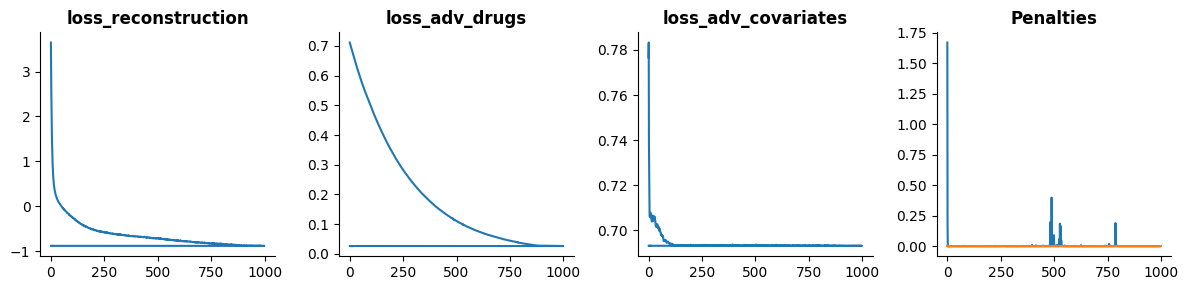

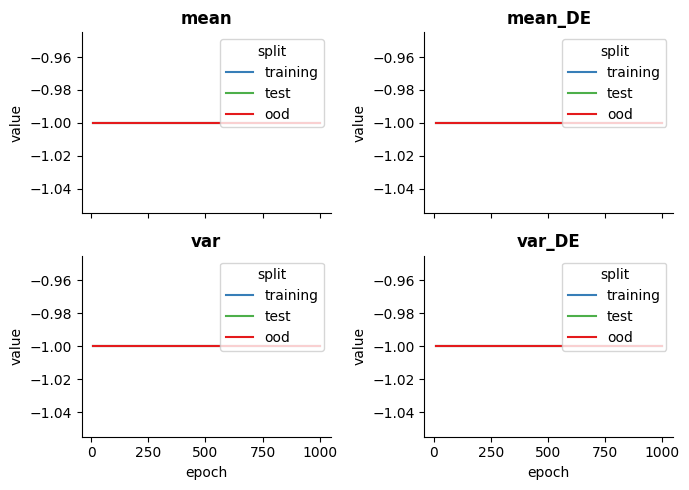

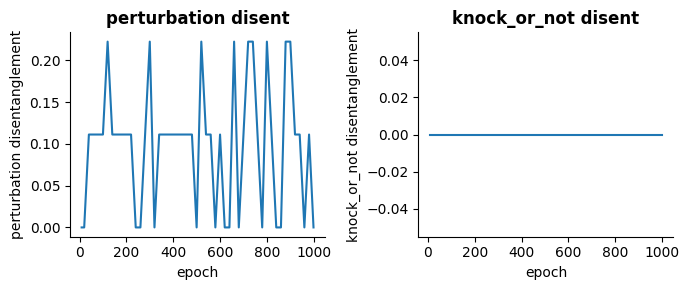

In [44]:
from cpa.plotting import CPAHistory
pretty_history = CPAHistory(cpa_api)
pretty_history.print_time()
pretty_history.plot_losses()
pretty_history.plot_r2_metrics(epoch_min=0)
pretty_history.plot_disentanglement_metrics(epoch_min=0)

In [63]:
genes_control = cpa_api.datasets['test'].subset_condition(control=True).genes
anndata_pre = cpa_api.predict(
    genes_control,
    cov={'knock_or_not': ['yes']}, 
    pert=['Smyd5-2'],
    dose=['1'],
    return_anndata=True,
    sample=False
)


tensor([[ 0.7868, -1.0308,  0.9193,  ...,  0.6649, -0.9018, -0.2946],
        [ 0.7868, -1.0308,  0.9193,  ...,  0.6649, -0.9018, -0.2946],
        [ 0.7868, -1.0308,  0.9193,  ...,  0.6649, -0.9018, -0.2946],
        ...,
        [ 0.7868, -1.0308,  0.9193,  ...,  0.6649, -0.9018, -0.2946],
        [ 0.7868, -1.0308,  0.9193,  ...,  0.6649, -0.9018, -0.2946],
        [ 0.7868, -1.0308,  0.9193,  ...,  0.6649, -0.9018, -0.2946]],
       device='cuda:0', grad_fn=<EmbeddingBackward0>)
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/cnic02/miniconda3/envs/cb/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_60073/1586632246.py", line 2, in <module>
    anndata_pre = cpa_api.predict(
  File "/home/cnic02/wangyn/projects/new/CPA/cpa/api.py", line 942, in predict
    closest_cond_cos,
  File "/home/cnic02/wangyn/projects/new/CPA/cpa/api.py", line 777, in compute_uncertainty
  File "/home/cnic02/wangyn/projects/new/CPA/cpa/api.py", line 742, in compute_comb_emb
    tmp_ad = sc.AnnData(X=X)
UnboundLocalError: local variable 'tmp_ad' referenced before assignment

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/cnic02/miniconda3/envs/cb/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2102, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/home/cni

In [64]:
genes_control = genes_control.numpy()
genes_control = genes_control.T
genes = pd.DataFrame(genes_control)

In [65]:
genes

,0,1,2,3,4,5,6,7,8
0,2.663640,2.361763,3.473567,3.537143,3.793344,3.801299,3.885267,3.560269,2.821351
1,4.997567,4.871223,5.521318,4.985968,5.080704,5.843260,5.742072,4.951774,4.700342
2,3.258663,0.377074,3.620242,0.494236,0.304561,3.741159,3.575843,3.891384,2.700467
3,4.871665,4.482229,3.865845,4.021733,4.312796,4.274449,3.977438,3.426256,3.411614
4,3.605145,3.478740,3.840729,3.679902,3.723516,4.069477,4.909153,3.952610,4.268351
...,...,...,...,...,...,...,...,...,...
3067,0.781963,0.000000,0.979192,0.000000,0.000000,0.000000,0.000000,0.058244,0.133236
3068,0.658283,0.000000,1.444619,0.000000,0.000000,0.000000,0.000000,0.036717,0.075808
3069,0.000000,0.000000,1.282271,0.000000,0.000000,0.000000,0.000000,0.080222,0.088611
3070,0.412710,0.000000,0.712328,0.000000,0.000000,0.000000,0.000000,0.000000,0.073897


In [66]:
genes.to_csv('/data/share/cnic02/projects/perturb_cwt/bulk_3072_test_CPA_tran.csv')